In [3]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os
import scipy as sci
import numpy as np
import matrix_handler as mx
from solvers_lab5 import Landweber
from solvers_lab5 import Jacobi_iterative
from solvers_lab5 import Gauss_Seidel_iterative
from solvers_lab5 import SOR_method
from solvers_lab5 import SD_method
from solvers_lab5 import Kaczmarz_algorithm

zadania = "zadania"

In [4]:
def Grand_Solverr(A, b, x0, x_e, algorithmss):
    xv = []
    fig, ax = plt.subplots()
    colors = ["orange", "black", "blue", "red", "green", "pink"]
    plt.figure(1)
    plt.legend(loc="upper right")
    plt.title("Porównanie metod iteracyjnych")
    plt.ylabel("błąd residualny")
    plt.xlabel("iteracja k")
    plt.show()
    for i in algorithmss:
        x, graph = i(A, b, x0, x_exact=x_e)
        plt.figure(1)
        ax.plot(graph[0], graph[1], c=colors[algorithmss.index(i)], marker="*", label=str(i.__name__), linestyle="--")
        plt.figure(2)
        ax.plot(graph[0], graph[2], c=colors[algorithmss.index(i)], marker="*", label=str(i.__name__), linestyle="--")
        xv.append(x)
    plt.legend(loc="upper right")
    plt.title("Porównanie metod iteracyjnych")
    plt.ylabel("błąd rozwiązania")
    plt.xlabel("iteracja k")
    plt.show()
    return xv
    

In [6]:
A = np.loadtxt(os.path.join(zadania, "zad1_A.txt") , float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad1_b.txt"), float, delimiter=" ", ndmin=1)
xe = np.loadtxt(os.path.join(zadania, "zad1_xe.txt"), float, delimiter=" ", ndmin=1)

x0 = np.array([0, 0, 0, 0])

xLandweber, graphLandweber = Landweber(A, b, x0)
xJacobi, graphJacobi = Jacobi_iterative(A, b, x0)
xGauss_Seidel, graphGaussSeidel = Gauss_Seidel_iterative(A, b, x0)
xSOR, graphSOR = SOR_method(A, b, x0, omega=0.45) # We should calculate appropriate omega
xSD, graphSD = SD_method(A, b, x0)
xKaczmarz, graphKaczmarz = Kaczmarz_algorithm(A, b, x0)

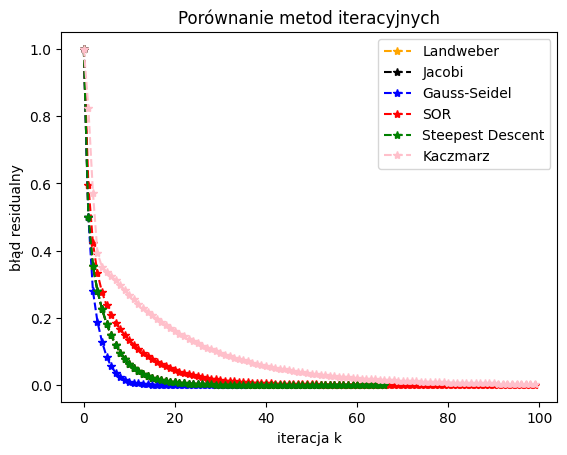

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.figure(1)
ax.plot(graphLandweber[0], graphLandweber[1], marker="*", linestyle="--",  c="orange", label="Landweber")
ax.plot(graphJacobi[0], graphJacobi[1], marker="*", linestyle="--", c="black", label="Jacobi")
ax.plot(graphGaussSeidel[0], graphGaussSeidel[1], marker="*", linestyle="--",  c="blue", label="Gauss-Seidel")
ax.plot(graphSOR[0], graphSOR[1], marker="*", linestyle="--", c="red", label="SOR")
ax.plot(graphSD[0], graphSD[1], marker="*", linestyle="--", c="green", label="Steepest Descent")
ax.plot(graphKaczmarz[0], graphKaczmarz[1], marker="*", linestyle="--", c="pink", label="Kaczmarz")

plt.title("Porównanie metod iteracyjnych")
plt.ylabel("błąd residualny")
plt.xlabel("iteracja k")
plt.legend(loc="upper right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


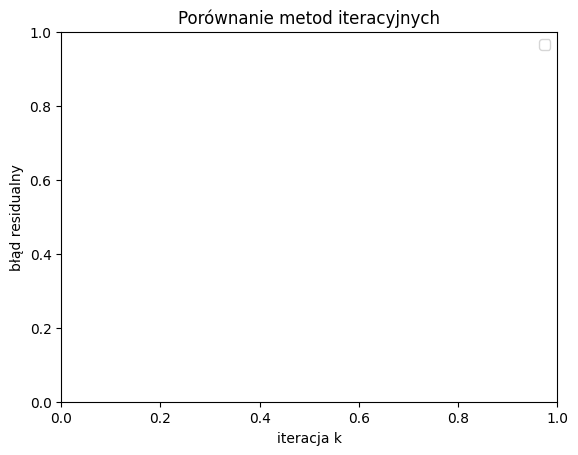

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

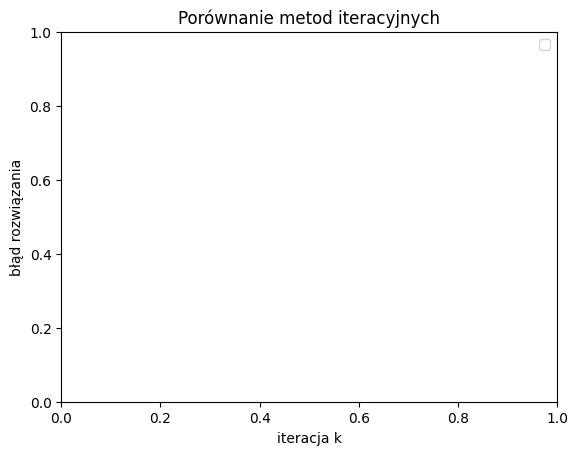

[array([0.99999864, 1.99999822, 2.9999978 , 3.9999989 ]), array([0.99999911, 1.99999883, 2.99999906, 3.99999953]), array([0.99999864, 1.99999822, 2.9999978 , 3.9999989 ]), array([0.9724376 , 1.95634017, 2.95725752, 3.9741388 ]), array([0.99999864, 1.99999822, 2.9999978 , 3.9999989 ]), array([0.98665842, 1.98098189, 2.98352244, 3.99176122])]


In [8]:
algorithmss = [Jacobi_iterative, Gauss_Seidel_iterative, Landweber, SOR_method, SD_method, Kaczmarz_algorithm]
print(Grand_Solverr(A, b, x0, xe, algorithmss))